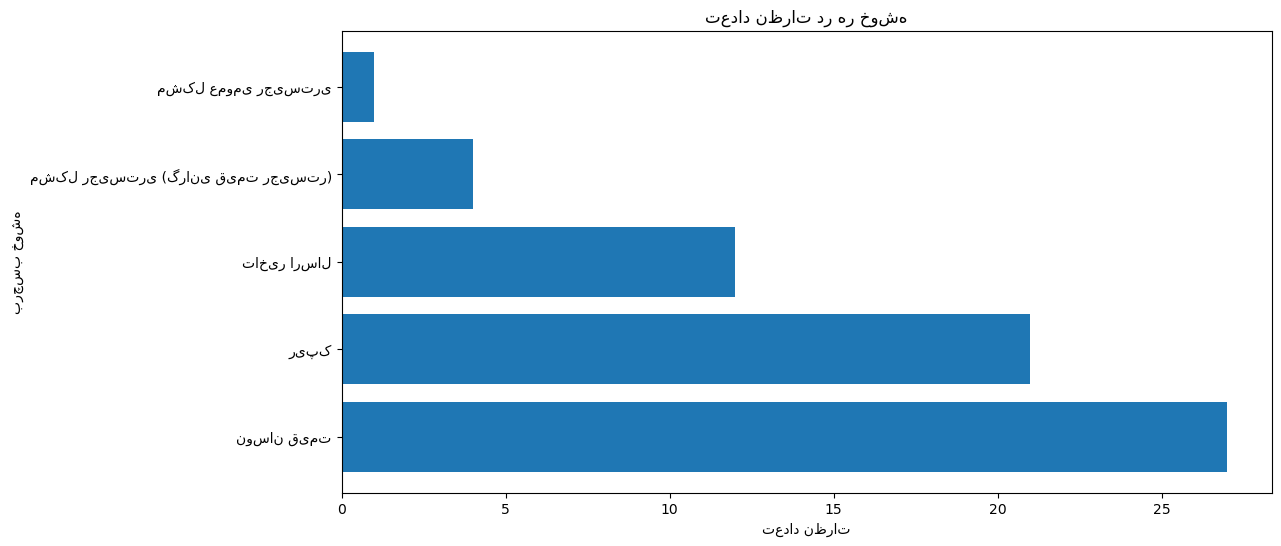

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


file_path = "digikala_comments.xlsx"
df = pd.read_excel(file_path)


df["text"] = df["text"].astype(str)
df["head"] = df["head"].astype(str)


persian_stop_words = [
    "و", "در", "به", "از", "که", "این", "را", "با", "برای", "است",
    "یک", "هم", "تا", "می", "شود", "کرد", "کردن", "داشت", "داشتن",
    "اما", "اگر", "آن", "آنها", "او", "خود", "ما", "شما", "آنچه",
    "چرا", "چگونه", "نیز", "بین", "روی", "بر", "بود", "بودن", "دیگر",
]


vectorizer = TfidfVectorizer(max_features=5000, stop_words=persian_stop_words)
X = vectorizer.fit_transform(df["text"])


num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X)


cluster_names = {}
for cluster_id in range(num_clusters):
    cluster_texts = df[df["cluster"] == cluster_id]["text"].tolist()
    cluster_heads = df[df["cluster"] == cluster_id]["head"].tolist()
    most_common_head = max(set(cluster_heads), key=cluster_heads.count)
    cluster_names[cluster_id] = most_common_head


for index, row in df.iterrows():
    if "رجیستری" in row["text"] or "ریجستر" in row["text"]:
        text = row["text"]
        if "گرانی" in text or "قیمت" in text or "تعرفه" in text:
            df.at[index, "cluster_label"] = "مشکل رجیستری (گرانی قیمت رجیستر)"
        elif "فعال‌سازی" in text or "عدم ثبت" in text:
            df.at[index, "cluster_label"] = "مشکل رجیستری (عدم ثبت یا فعال‌سازی)"
        elif "ریپک" in text or "دوباره بسته‌بندی شده" in text:
            df.at[index, "cluster_label"] = "مشکل رجیستری (گوشی ریپک شده و غیر اصل)"
        elif "مرجوع" in text or "بازگشت وجه" in text:
            df.at[index, "cluster_label"] = "مشکلات توضیع کننده (تأخیر در فرآیند رجیستری و مرجوعی)"
        elif "مالکیت" in text or "انتقال" in text:
            df.at[index, "cluster_label"] = "مشکل رجیستری (عدم امکان انتقال مالکیت)"
        elif "گارانتی" in text or "ضمانت" in text:
            df.at[index, "cluster_label"] = "مشکل رجیستری (مشکلات گارانتی پس از رجیستر نشدن)"
        elif "اطلاع‌رسانی" in text or "مشاوره اشتباه" in text:
            df.at[index, "cluster_label"] = "مشکل رجیستری (اطلاع‌رسانی ناقص درباره رجیستر شدن گوشی)"
        else:
            df.at[index, "cluster_label"] = "مشکل عمومی رجیستری"
    else:
        df.at[index, "cluster_label"] = cluster_names[row["cluster"]]


output_file_path = "clustered_digikala_comments.xlsx"
df.to_excel(output_file_path, index=False)


cluster_counts = df["cluster_label"].value_counts()
plt.figure(figsize=(12, 6))
plt.barh(cluster_counts.index[::-1], cluster_counts.values[::-1])
plt.xlabel("تعداد نظرات")
plt.ylabel("برچسب خوشه")
plt.title("تعداد نظرات در هر خوشه")
plt.gca().invert_yaxis()
plt.show()
